In [1]:
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\KIIT\Downloads\amazon_alexa_data.csv")

In [3]:
data.head()

,Unnamed: 0,rating,date,variation,verified_reviews,feedback
0,0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data['rating'] = data['rating'].apply(lambda x: 1 if x >= 3 else 0)
data = data[['rating','verified_reviews']]

In [5]:
data.head()

,rating,verified_reviews
0,1,Love my Echo!
1,1,Loved it!
2,1,"Sometimes while playing a game, you can answer..."
3,1,I have had a lot of fun with this thing. My 4 ...
4,1,Music


In [6]:
data['rating'].value_counts()

1    2893
0     257
Name: rating, dtype: int64

(array([ 257.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2893.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

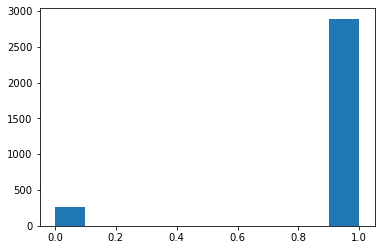

In [7]:
plt.hist(data['rating'])

In [8]:
STOPWORDS = stopwords.words("english")

In [9]:
def clean(x):
    x = x.lower()
    x = re.sub("[^\w\d]"," ",x)
    x = " ".join([y for y in x.split() if y not in STOPWORDS])
    return x

In [10]:
data['text'] =  data['verified_reviews'].apply(lambda x : clean(x))

In [11]:
data.head()

,rating,verified_reviews,text
0,1,Love my Echo!,love echo
1,1,Loved it!,loved
2,1,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,1,I have had a lot of fun with this thing. My 4 ...,lot fun thing 4 yr old learns dinosaurs contro...
4,1,Music,music


In [12]:
np.array(data['text'][0:5])

array(['love echo', 'loved',
       'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home',
       'lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well',
       'music'], dtype=object)

In [13]:
x=  np.array(data['text'])
y = np.array(data['rating'])

In [14]:
x[:3]

array(['love echo', 'loved',
       'sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home'],
      dtype=object)

In [15]:
y[:3]

array([1, 1, 1], dtype=int64)

In [16]:
data['rating'].shape


(3150,)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=True,random_state=42,stratify=y)


In [18]:
x_train.shape


(2835,)

In [19]:
token = Tokenizer(num_words=5000)
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

In [20]:
vocab_size = len(token.word_index) +  1
maxlen = 30

In [21]:
x_train[:5]


[[96],
 [260, 2, 39, 1, 74, 63, 109, 290, 146],
 [3, 16, 6, 57, 49, 64],
 [567, 1, 205, 50, 78, 3],
 [4, 206, 851, 941, 63, 10]]

In [22]:
x_train = pad_sequences(x_train,padding='pre',maxlen=maxlen)
x_test = pad_sequences(x_test,padding='pre',maxlen=maxlen)

In [23]:
x_train


array([[   0,    0,    0, ...,    0,    0,   96],
       [   0,    0,    0, ...,  109,  290,  146],
       [   0,    0,    0, ...,   57,   49,   64],
       ...,
       [   0,    0,    0, ...,  321,  268,  105],
       [   0,  352, 1583, ...,    5,  121,  692],
       [   0,    0,    0, ...,  337, 1853, 1854]])

In [24]:
model = Sequential([
    Embedding(vocab_size,100,input_length=maxlen),
    Dropout(0.2),
    LSTM(200),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])


In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           382600    
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 200)               240800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 623,601
Trainable params: 623,601
Non-trainable params: 0
_________________________________________________________________


In [27]:
history  = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))


Epoch 1/10
89/89 [==============================] - 11s 79ms/step - loss: 0.2944 - acc: 0.9146 - val_loss: 0.2487 - val_acc: 0.9175
Epoch 2/10
89/89 [==============================] - 6s 63ms/step - loss: 0.1882 - acc: 0.9397 - val_loss: 0.2091 - val_acc: 0.9206
Epoch 3/10
89/89 [==============================] - 5s 59ms/step - loss: 0.0882 - acc: 0.9690 - val_loss: 0.1738 - val_acc: 0.9365
Epoch 4/10
89/89 [==============================] - 5s 58ms/step - loss: 0.0488 - acc: 0.9806 - val_loss: 0.1397 - val_acc: 0.9397
Epoch 5/10
89/89 [==============================] - 6s 62ms/step - loss: 0.0457 - acc: 0.9866 - val_loss: 0.1809 - val_acc: 0.9429
Epoch 6/10
89/89 [==============================] - 5s 60ms/step - loss: 0.0326 - acc: 0.9905 - val_loss: 0.2323 - val_acc: 0.9397
Epoch 7/10
89/89 [==============================] - 6s 62ms/step - loss: 0.0230 - acc: 0.9933 - val_loss: 0.2194 - val_acc: 0.9460
Epoch 8/10
89/89 [==============================] - 6s 63ms/step - loss: 0.0197 - 

In [28]:
loss,acc =  model.evaluate(x_test,y_test)
acc

10/10 [==============================] - 0s 22ms/step - loss: 0.2376 - acc: 0.9460


0.9460317492485046

<AxesSubplot:title={'center':'Accuracy'}>

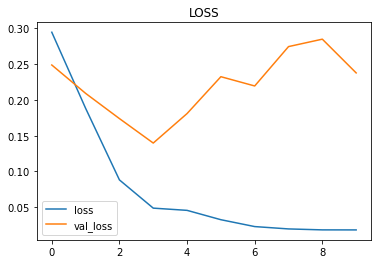

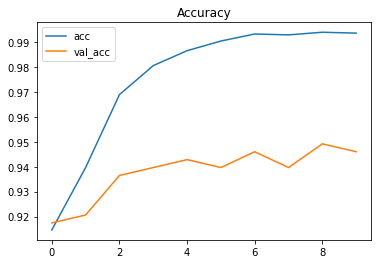

In [29]:
history_df = pd.DataFrame(history.history)
history_df[['loss','val_loss']].plot(title='LOSS')
history_df[['acc','val_acc']].plot(title='Accuracy')

In [30]:
def preprocess(text):
    text = token.texts_to_sequences(text)
    text =  pad_sequences(text,padding='pre',maxlen=maxlen)
    return text

In [31]:
def predict(text):
    text = preprocess(text)
    pred = model.predict(text)
    return pred

In [32]:
predict(["like siri fact siri answers accurately alexa see real need household though good bargain prime day deals"])


1/1 [==============================] - 1s 909ms/step


array([[0.00035855]], dtype=float32)